In [57]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load data
data = pd.read_csv('data/Cancer_Data.csv')
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop the 'Unnamed: 32' column, which has all NaN values
data.drop(columns=['Unnamed: 32'], inplace=True)

# Check for missing values and impute with median (for numeric columns)
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':
            # Impute categorical columns with mode
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            # Impute numeric columns with median
            data[col].fillna(data[col].median(), inplace=True)

# Check for duplicates and remove them
data.drop_duplicates(inplace=True)

# Optional: Check for outliers using Z-score and remove them (if needed)
numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())
data = data[(z_scores < 3).all(axis=1)]

print("Data is clean and ready for modeling.")
print(data.head())

Data is clean and ready for modeling.
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
4          0.10030           0.13280          0.1980              0.10430   
5          0.12780           0.17000          0.1578              0.08089   
6          0.09463           0.10900          0.1127              0.07400   

   ...  radius_worst  te

In [59]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# # Load data
# data = pd.read_csv('data/Cancer_Data.csv')
# data.replace([np.inf, -np.inf], np.nan, inplace=True)
# #data = data.dropna()
# data.drop(columns=['Unnamed: 32'], inplace=True)
# #print(data['fractal_dimension_worst'])

# # Check for missing values
# if data.isnull().sum().sum() > 0:
#     raise ValueError("Data contains missing values. Please clean or impute the missing data.")

# # Check for infinite values only in numeric columns
# numeric_cols = data.select_dtypes(include=[np.number]).columns
# if not np.isfinite(data[numeric_cols]).all().all():
#     raise ValueError("Data contains infinite values. Please clean or remove infinite values.")

# # Check for duplicates
# if data.duplicated().any():
#     raise ValueError("Data contains duplicate rows. Please remove duplicates.")

# # Check for valid data types
# expected_types = {
#     'id': np.int64,
#     'diagnosis': object,  # 'object' is typically used for categorical data in pandas
#     'radius_mean': np.float64,
#     'texture_mean': np.float64,
#     'perimeter_mean': np.float64,
#     'area_mean': np.float64,
#     # Add checks for all other columns
# }

# for col, expected_type in expected_types.items():
#     if not np.issubdtype(data[col].dtype, expected_type):
#         raise TypeError(f"Column '{col}' has incorrect type {data[col].dtype}. Expected {expected_type}.")

# # Optional: Check for outliers (simple example using Z-score)
# z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())
# if (z_scores > 3).any().any():
#     raise ValueError("Data contains outliers. Consider handling outliers before proceeding.")

# print("All checks passed. Data is clean and ready for modeling.")


Data Checks

In [60]:
# Validate data
print(f"Data Shape: {data.shape}")

Data Shape: (487, 32)


In [61]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [62]:
print(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [63]:
print(data.describe)

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
4    84358402         M        20.29         14.34          135.10     1297.0   
5      843786         M        12.45         15.70           82.57      477.1   
6      844359         M        18.25         19.98          119.60     1040.0   
..        ...       ...          ...           ...             ...        ...   
560    925292         B        14.05         27.15           91.38      600.4   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858

Preprocess Data

In [64]:
#change 'M' --> Malignant and 'B' --> Benign
data['diagnosis'] = data['diagnosis'].replace({'M': 'Malignant', 'B': 'Benign'})
print(data.head())
print(data.size)

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1    842517  Malignant        20.57         17.77          132.90     1326.0   
2  84300903  Malignant        19.69         21.25          130.00     1203.0   
4  84358402  Malignant        20.29         14.34          135.10     1297.0   
5    843786  Malignant        12.45         15.70           82.57      477.1   
6    844359  Malignant        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
4          0.10030           0.13280          0.1980              0.10430   
5          0.12780           0.17000          0.1578              0.08089   
6          0.09463           0.10900          0.1127              0.07400   

   ...  radius_worst  texture_worst  perimeter_worst  ar

Graph Diagnosis Distribution (Malignant (Cancerous) vs Benign (Not Cancerous))

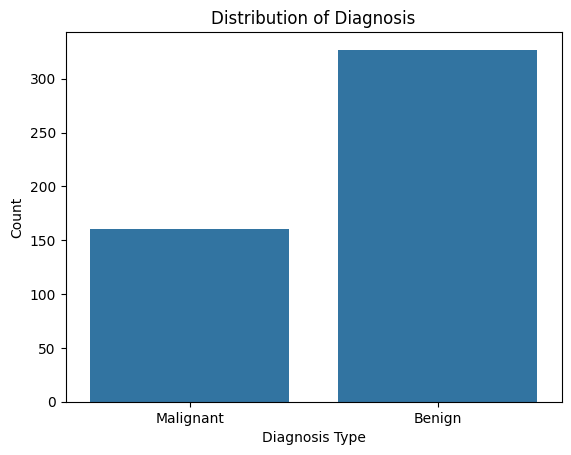

In [65]:
ax = sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis Type')
plt.ylabel('Count')
# ax.set_ylim(0,400)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
#                 textcoords='offset points')
plt.savefig('graphs/diagnosis_distribution.png')
plt.show()



In [66]:
# If there are missing values, you can drop them
#data.dropna(inplace=True)

# Alternatively, impute missing values
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


Encode Categories

In [67]:
# Encode the diagnosis column
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Verify encoding
print(data['diagnosis'].unique())  # Should output [1, 0] or similar


[1 0]


Feature Selection

In [68]:
# Drop the 'id' column
# data = data.drop(['id'], axis=1)

print(data.isnull().sum())  # Check for NaNs
print(np.isfinite(data).all())  # Check for infinite values

# Separate features and target
X = data.drop('diagnosis', axis=1).dropna()
y = data['diagnosis']

print(X.shape)


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
id                         True
diagnosis                  

Feature Scaling

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Remove or impute missing values
# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(data)

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_imputed)


Splitting the Data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

# Check for missing values
if (np.isnan(X_train).sum() != 0):
    raise ValueError("X_train has non-zero Values")
if (np.isnan(y_train).sum() != 0):
    raise ValueError("y_train has non-zero Values")
print("Data check: no nonzero values (success)")




Training set size: (389, 31)
Testing set size: (98, 31)
(389, 31)
(389,)
float64
int64
Data check: no nonzero values (success)


Training

In [71]:
# Initialize the model
logreg = LogisticRegression(random_state=42, max_iter=10000)

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [72]:
# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions

In [73]:
# Logistic Regression Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Random Forest Predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]


In [74]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.97      0.94      0.95        32

    accuracy                           0.97        98
   macro avg       0.97      0.96      0.96        98
weighted avg       0.97      0.97      0.97        98

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.86      0.94      0.90        32

    accuracy                           0.93        98
   macro avg       0.91      0.93      0.92        98
weighted avg       0.93      0.93      0.93        98



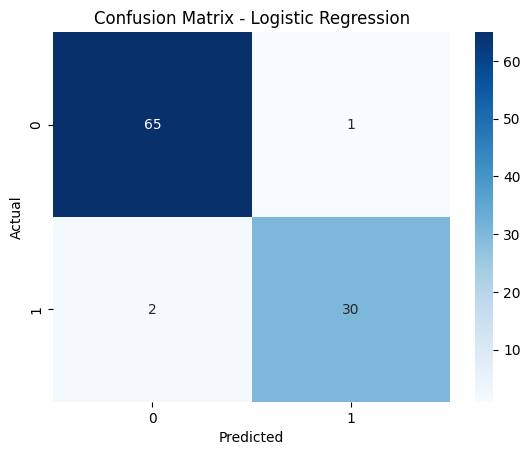

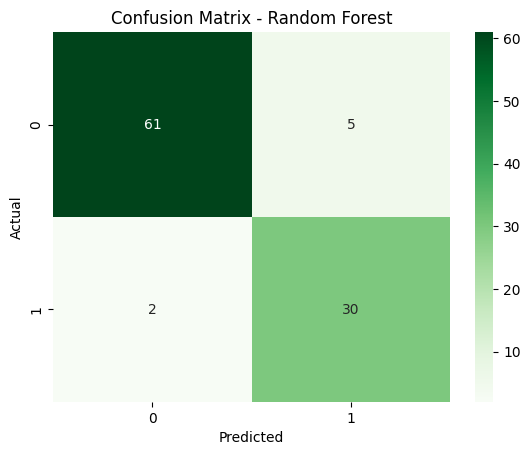

In [75]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('graphs/confusionMatrixLR')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('graphs/confusionMatrixRF')
plt.show()


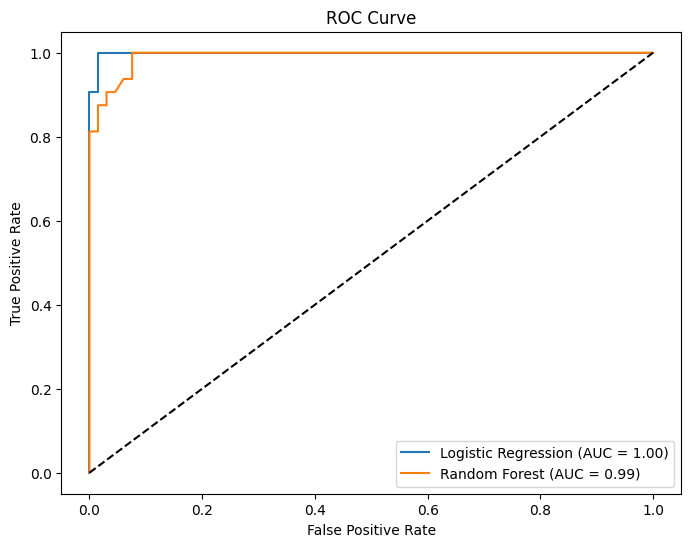

In [76]:
# ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('graphs/ROC_curve')
plt.show()


These graphs show 100% accuracy, with the given data. Of course this is likely not 100% accurate, but is a great indicator that this is an accurately trained model.